In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/house-prices-advanced-regression-techniques/test.csv')


# **DATA ANALYSIS:**

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.shape

(1460, 81)

In [5]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
df_test.shape

(1459, 80)

In [7]:
df_final = df_train.append(df_test)
df_final.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [8]:
df_final.shape

(2919, 81)

In [9]:
df_final.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

**Missing values:**

In [10]:
## Percentage of missing values
for column in df_final.columns:
  if df_final[column].isnull().sum()>1:
    print(column, np.round((df_final[column].isnull().mean())*100, 4),  ' % missing values')
  else:
    continue
    


MSZoning 0.137  % missing values
LotFrontage 16.6495  % missing values
Alley 93.2169  % missing values
Utilities 0.0685  % missing values
MasVnrType 0.8222  % missing values
MasVnrArea 0.7879  % missing values
BsmtQual 2.7749  % missing values
BsmtCond 2.8092  % missing values
BsmtExposure 2.8092  % missing values
BsmtFinType1 2.7064  % missing values
BsmtFinType2 2.7407  % missing values
BsmtFullBath 0.0685  % missing values
BsmtHalfBath 0.0685  % missing values
Functional 0.0685  % missing values
FireplaceQu 48.6468  % missing values
GarageType 5.3786  % missing values
GarageYrBlt 5.4471  % missing values
GarageFinish 5.4471  % missing values
GarageQual 5.4471  % missing values
GarageCond 5.4471  % missing values
PoolQC 99.6574  % missing values
Fence 80.4385  % missing values
MiscFeature 96.4029  % missing values
SalePrice 49.9829  % missing values


In [11]:
df_final.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [12]:
df_final.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
feature_with_na = [column for column in df_final.columns if df_final[column].isnull().sum()>1]

In [14]:
len(feature_with_na)

24

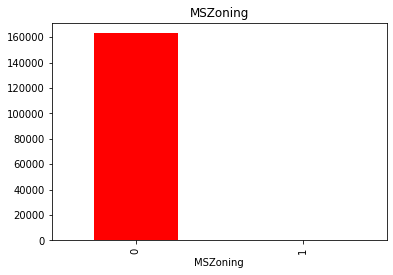

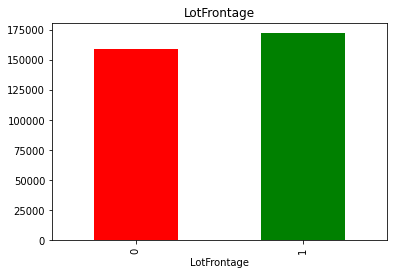

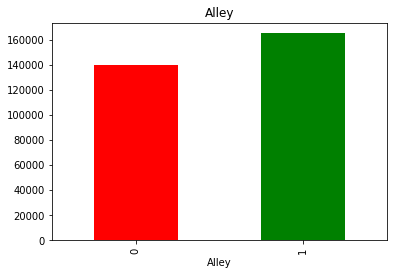

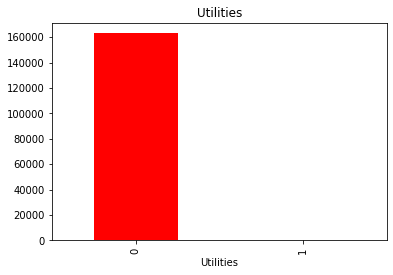

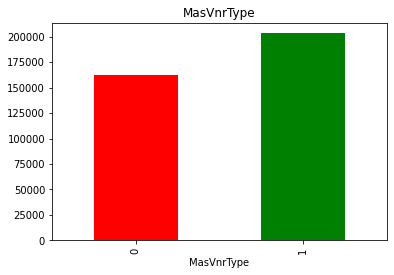

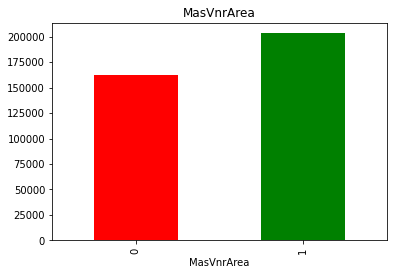

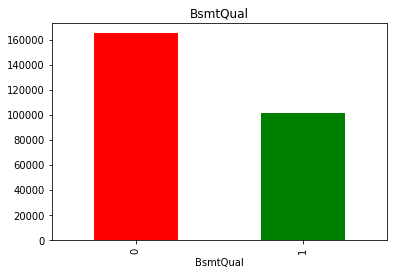

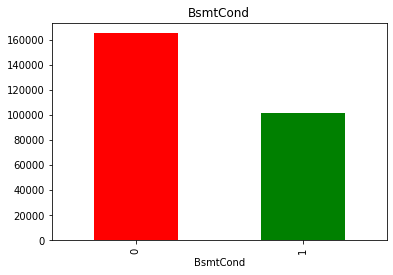

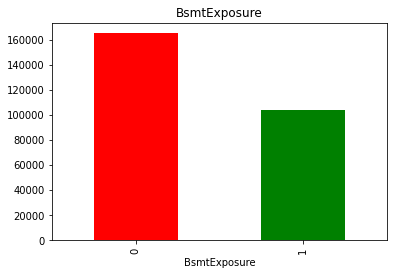

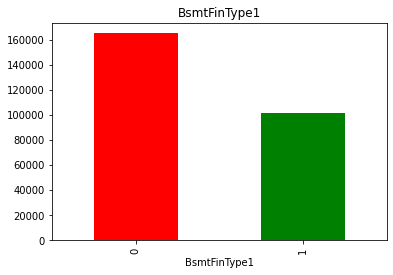

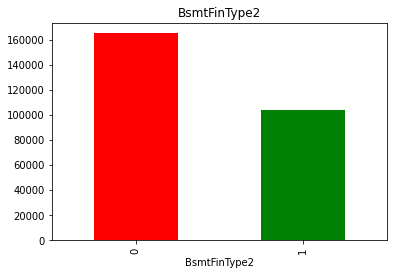

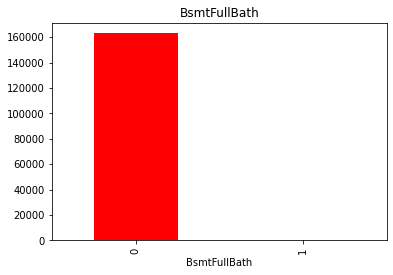

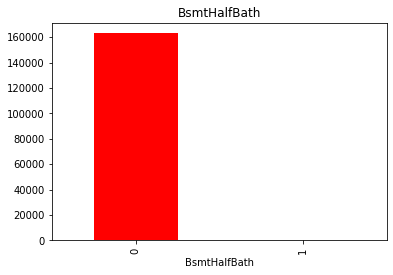

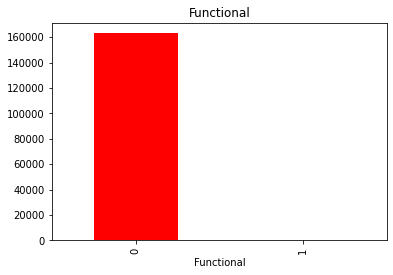

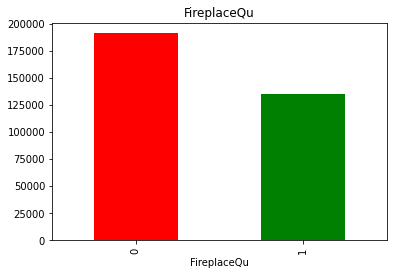

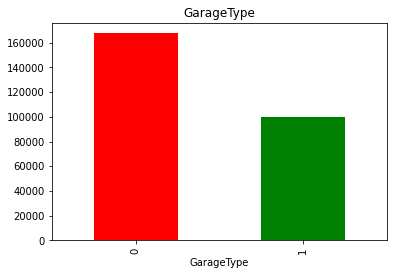

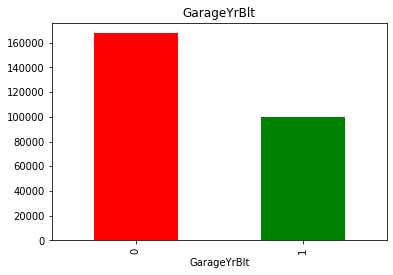

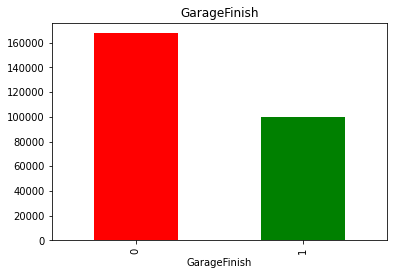

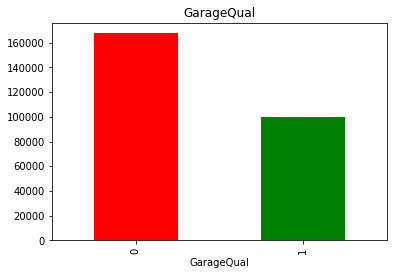

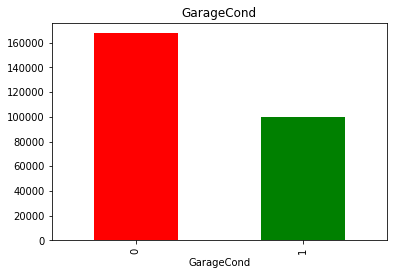

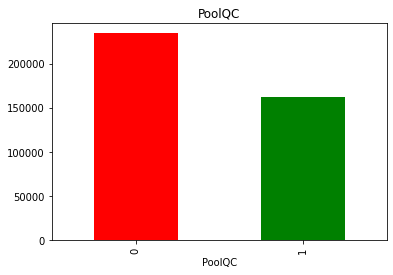

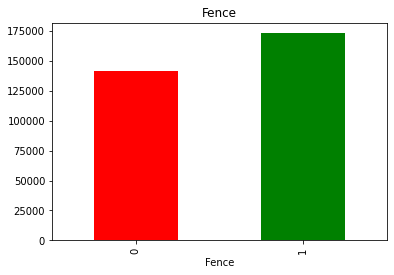

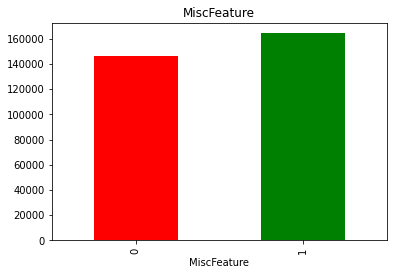

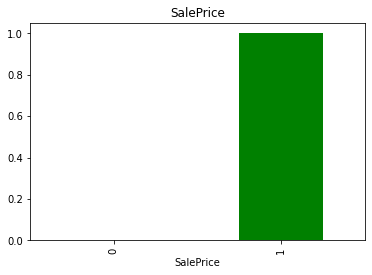

In [15]:
for column in feature_with_na:
    data = df_final.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[column] = np.where(data[column].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(column)['SalePrice'].median().plot.bar(color = ['red', 'green'])
    plt.title(column)
    plt.show()

**Numerical Variables:**

In [16]:
numerical_features = [feature for feature in df_final.columns if df_final[feature].dtype != 'O']

print('Number of numerical variables:', len(numerical_features))

df_final[numerical_features].head()

Number of numerical variables: 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,192,84,0,0,0,0,0,12,2008,250000.0


In [17]:
year_feature = [feature for feature in df_final.columns if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0.5, 1.0, 'House Price vs YearSold')

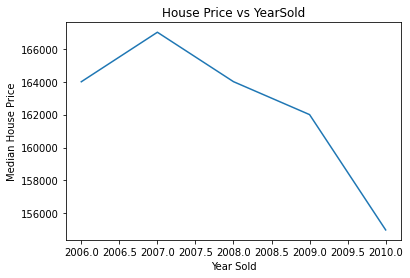

In [18]:
df_final.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

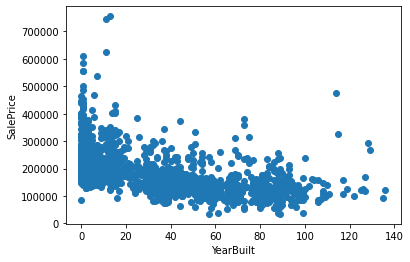

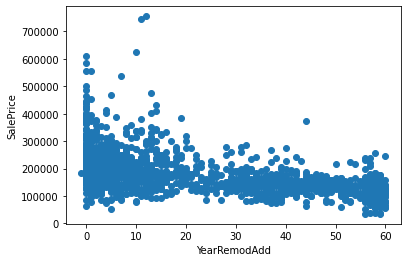

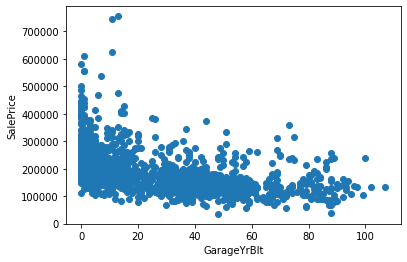

In [19]:
for feature in year_feature:
    if feature!='YrSold':
        data=df_final.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]

        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

**Discrete variables:**

In [20]:
discrete_feature=[feature for feature in numerical_features if len(df_final[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 14


In [21]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MoSold']

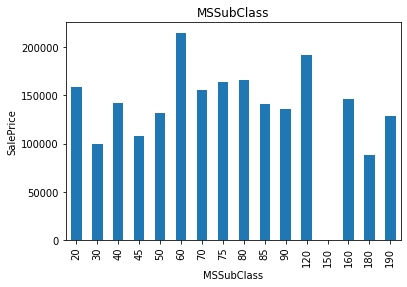

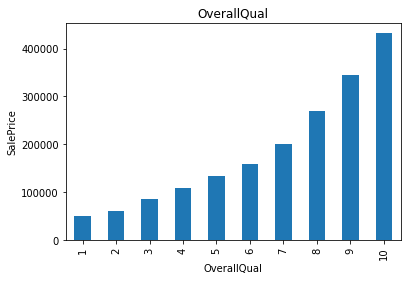

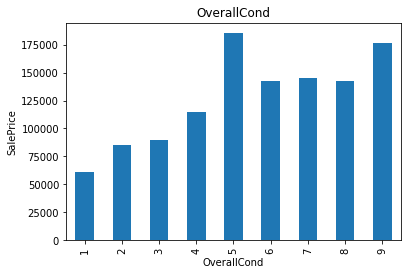

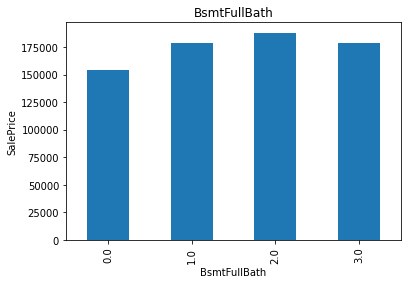

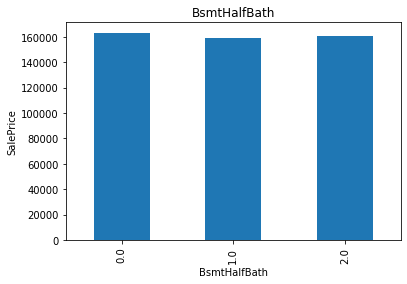

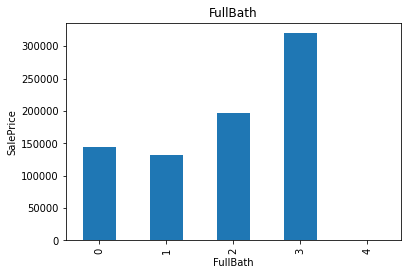

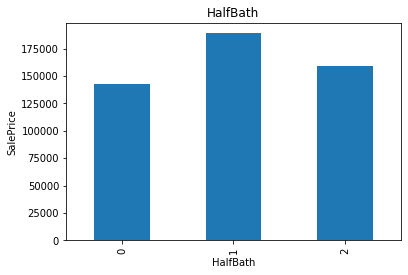

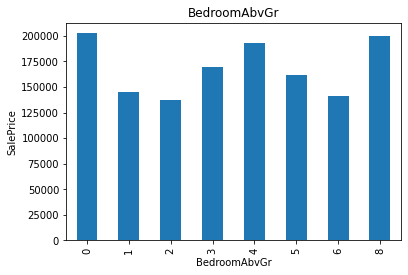

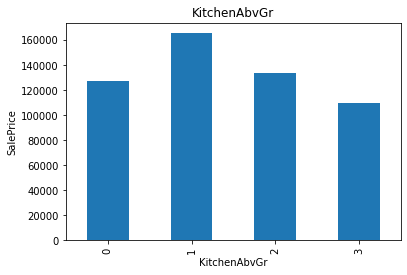

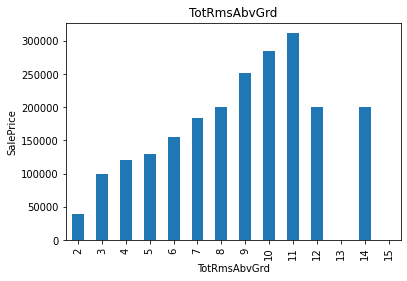

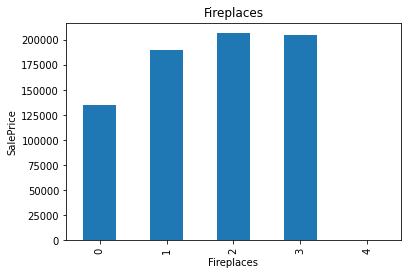

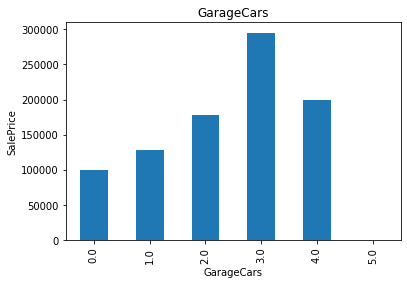

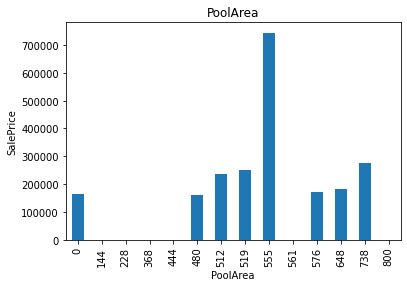

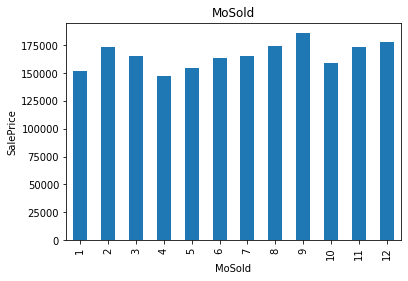

In [22]:

for feature in discrete_feature:
    data=df_final.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()
    

**Continuous Variable:**


In [23]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 19


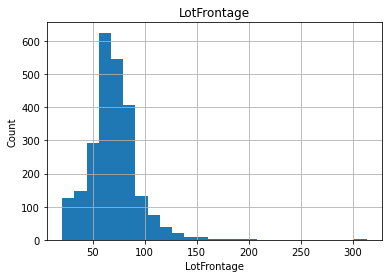

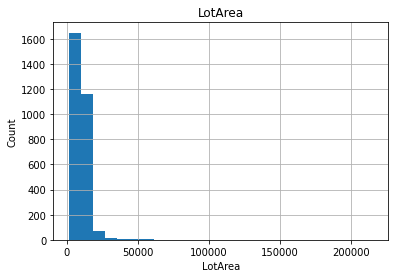

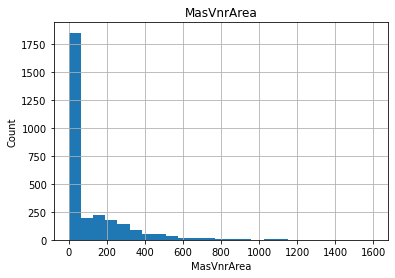

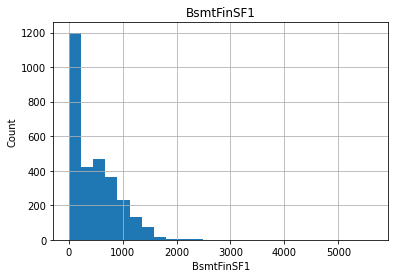

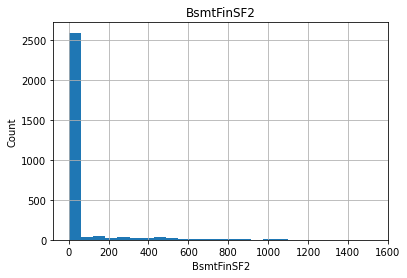

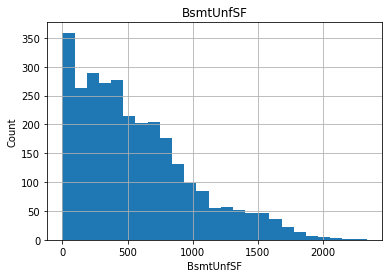

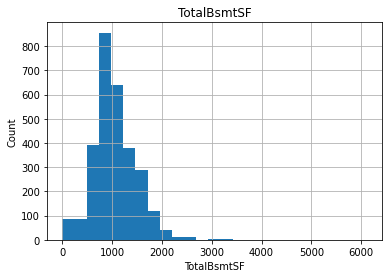

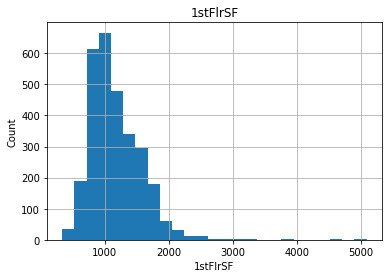

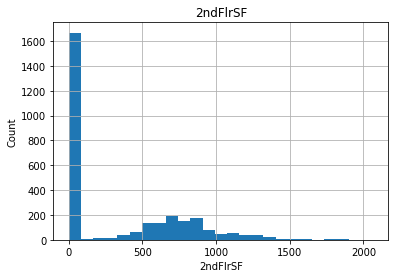

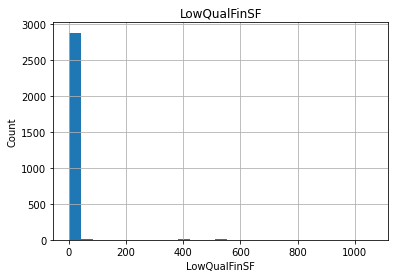

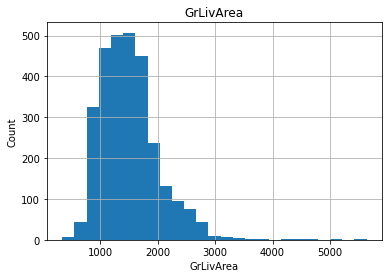

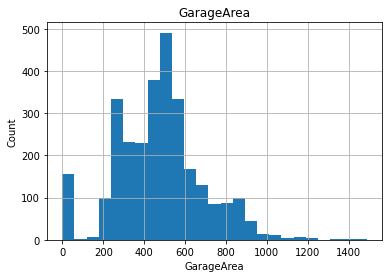

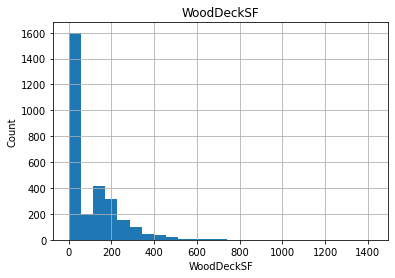

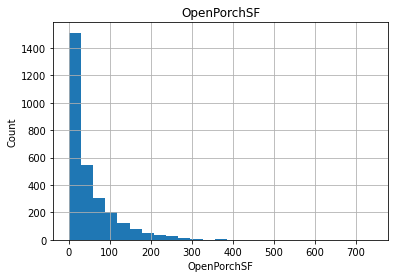

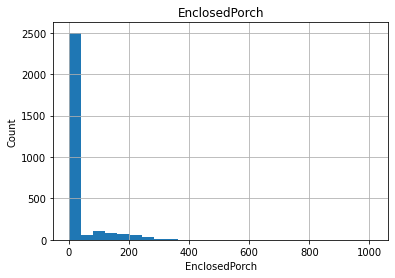

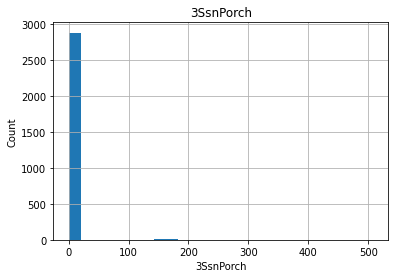

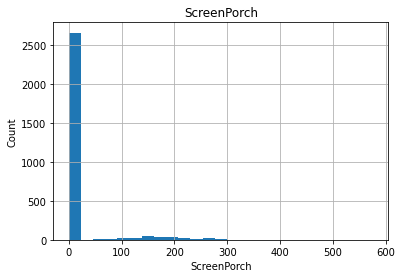

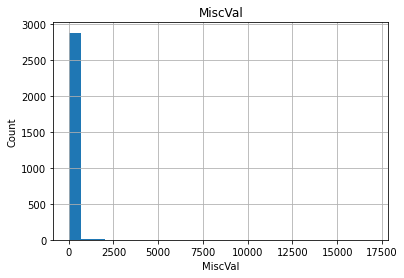

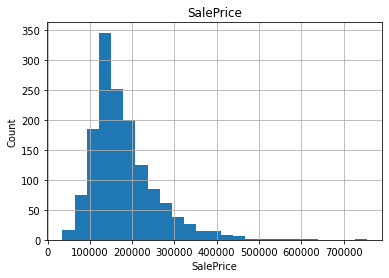

In [24]:
for feature in continuous_feature:
    data=df_final.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

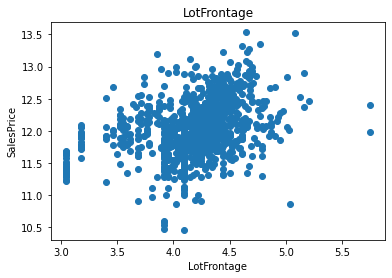

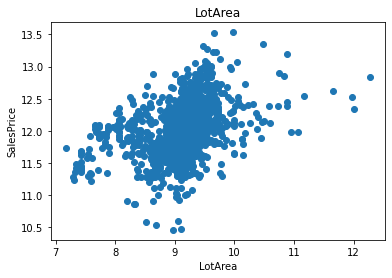

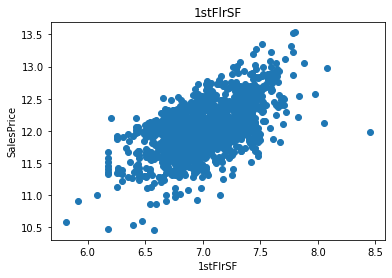

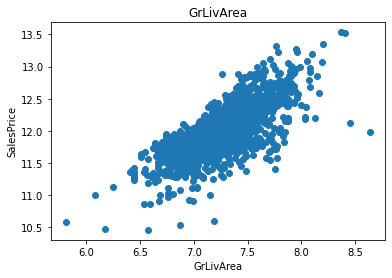

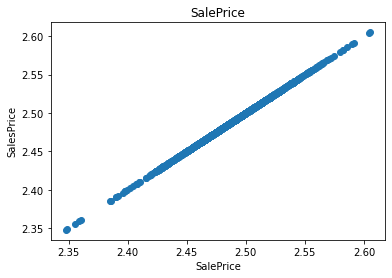

In [25]:
## We will be using logarithmic transformation


for feature in continuous_feature:
    data=df_final.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()
        

**Outliers:**


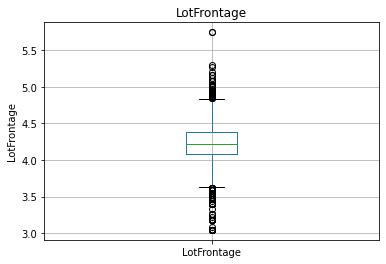

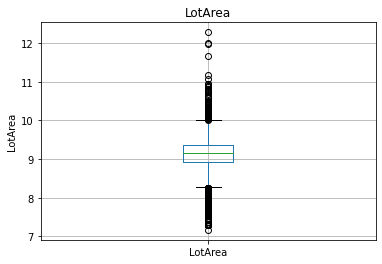

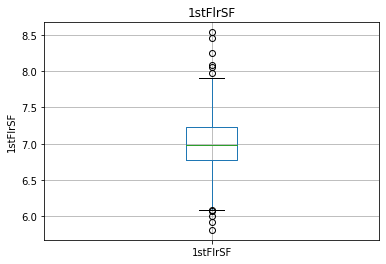

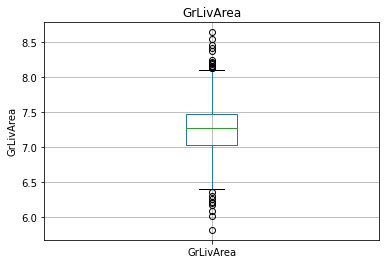

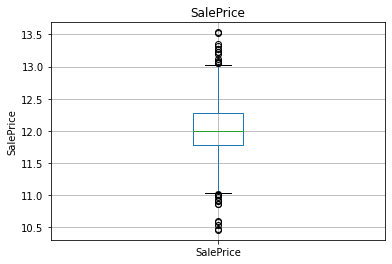

In [26]:
for feature in continuous_feature:
    data=df_final.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

**Categorical Variables**

In [27]:
categorical_features=[feature for feature in df_final.columns if data[feature].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [28]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df_final[feature].unique())))

The feature is MSZoning and number of categories are 6
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 3
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 16
The feature is Exterior2nd and number of categories are 17
The feature is MasVnrType and number of cate

In [29]:
## Find out the relationship between categorical variable and dependent feature

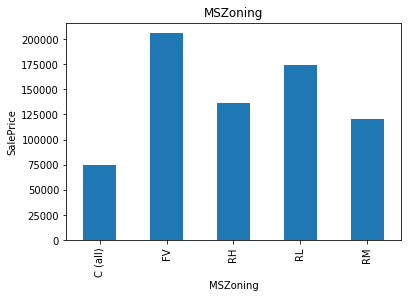

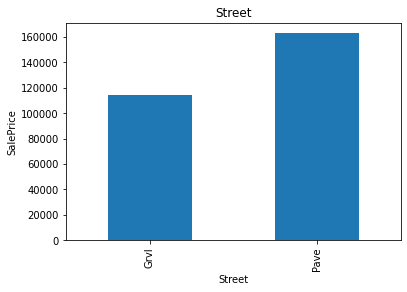

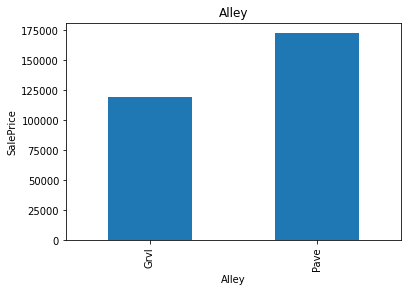

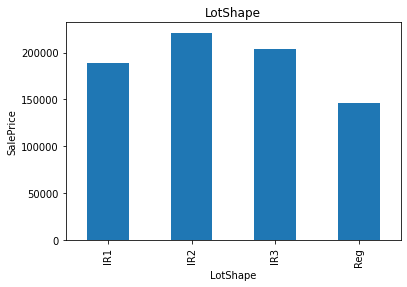

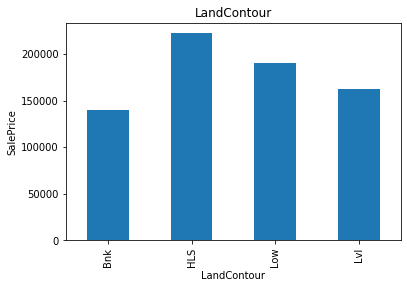

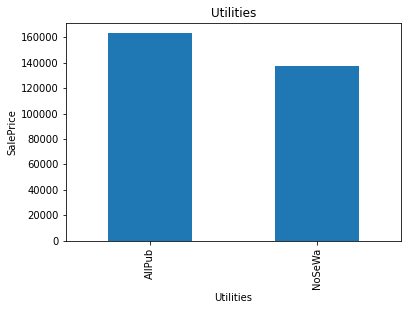

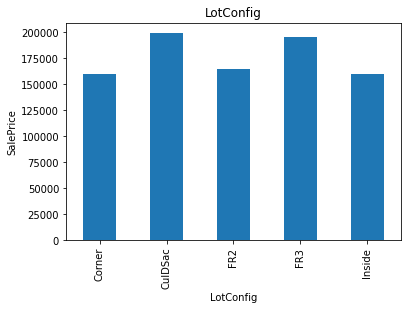

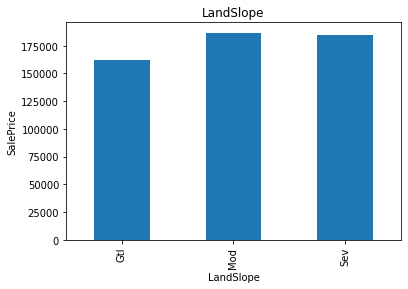

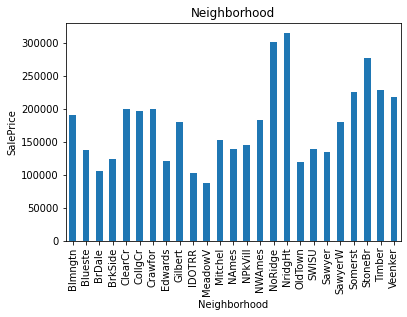

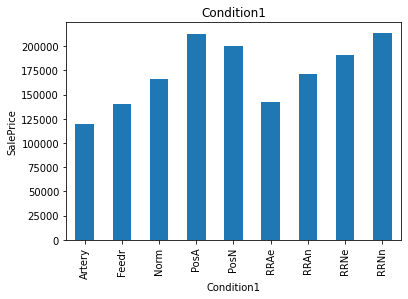

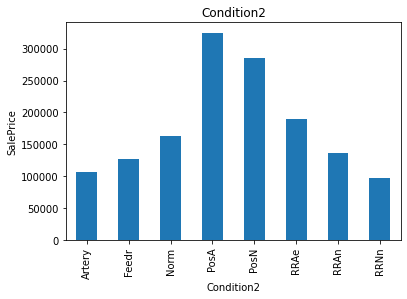

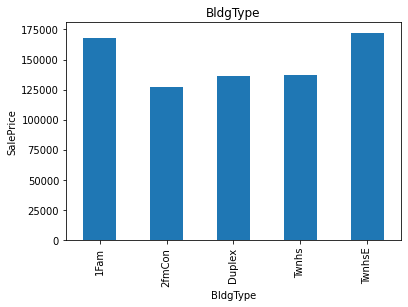

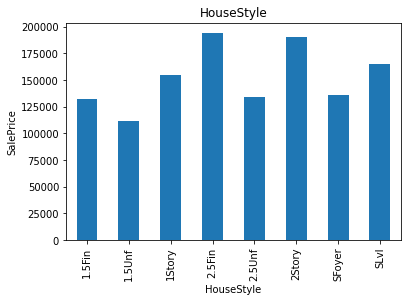

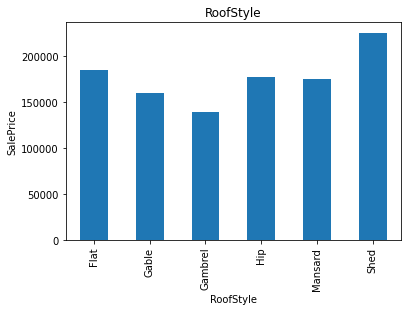

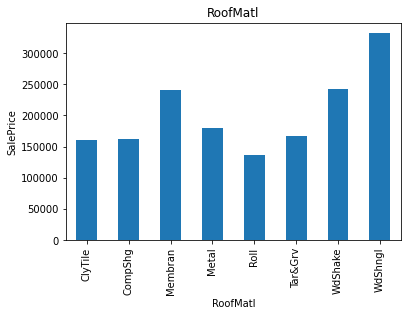

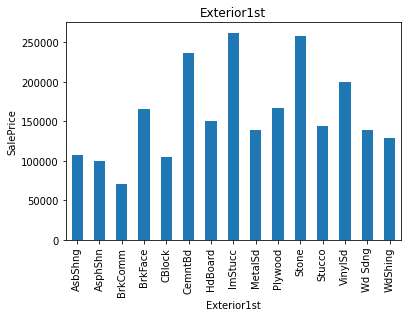

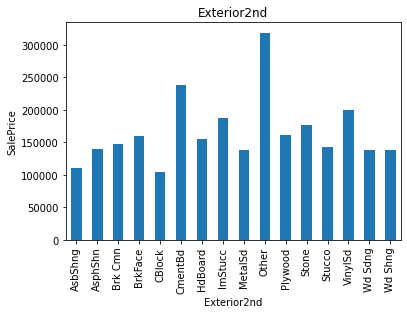

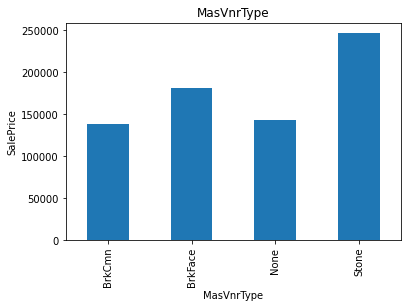

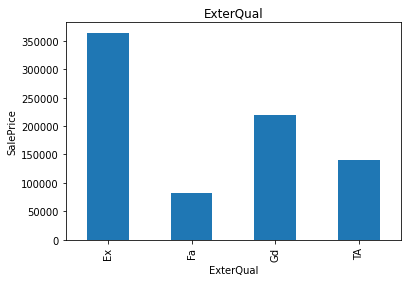

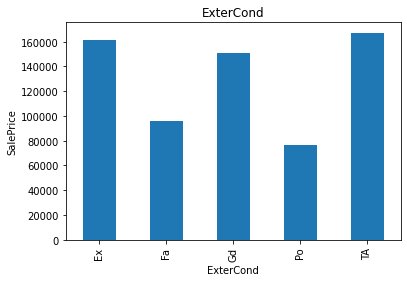

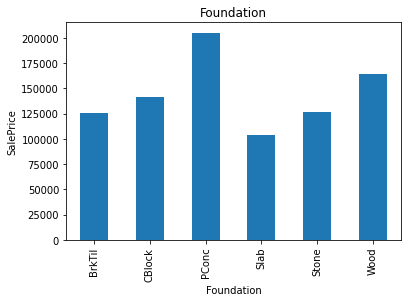

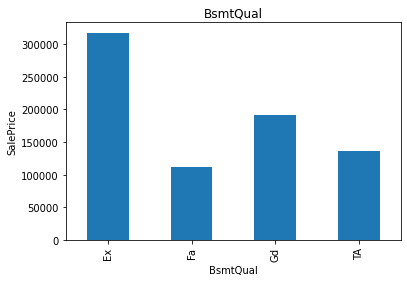

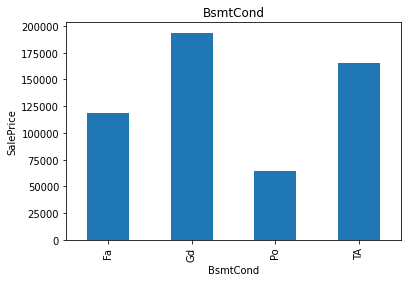

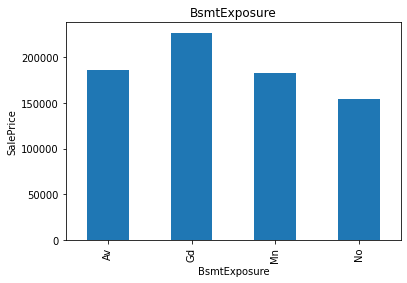

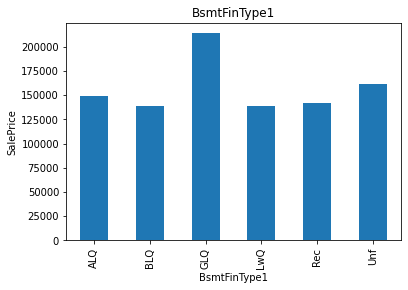

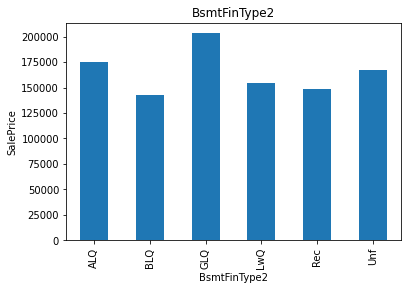

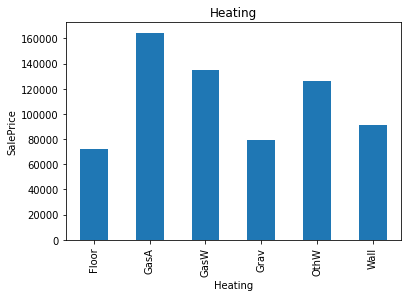

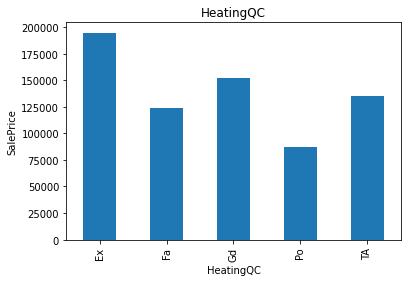

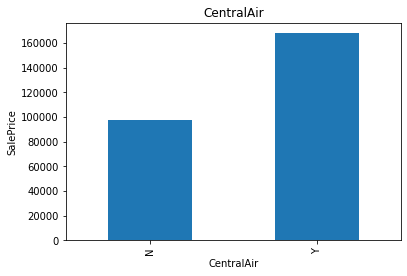

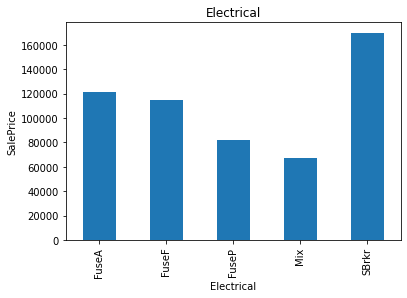

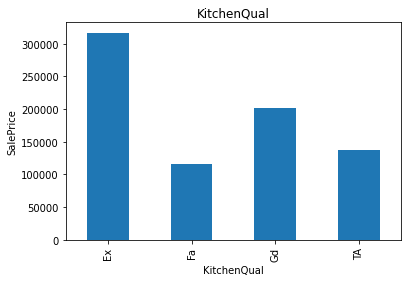

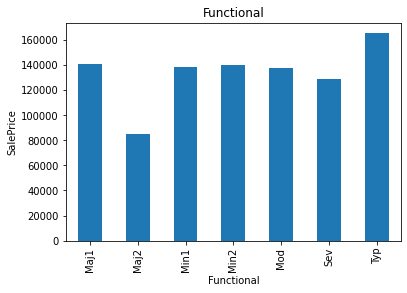

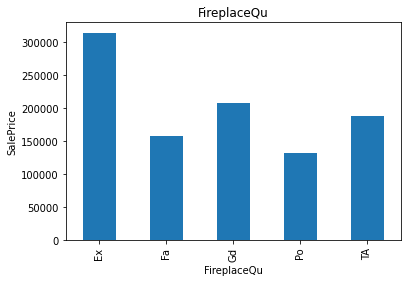

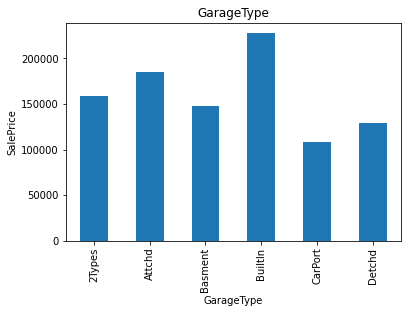

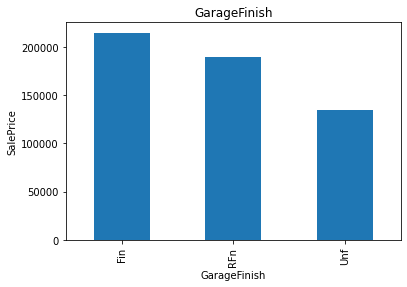

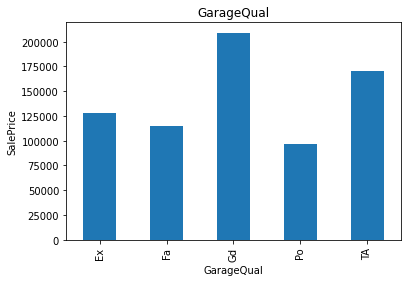

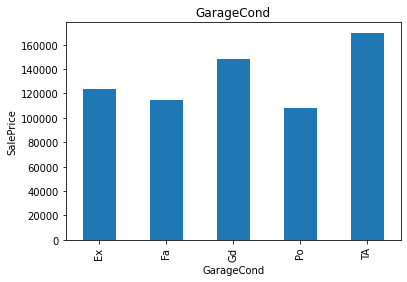

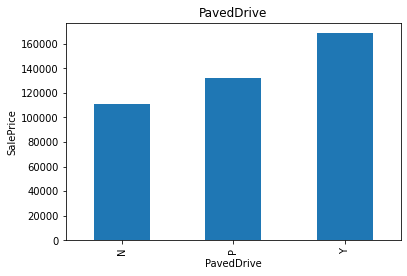

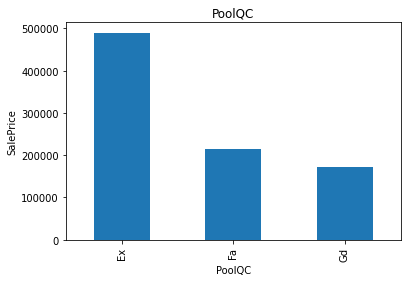

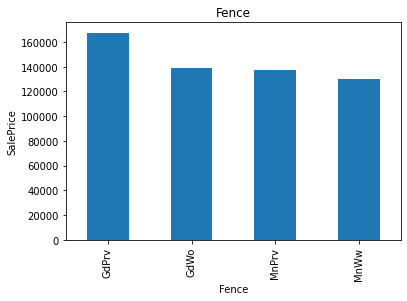

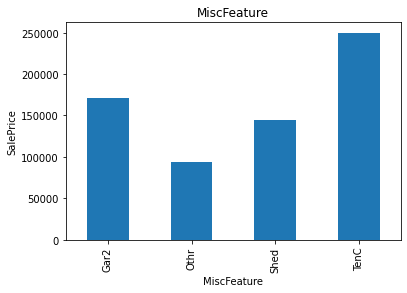

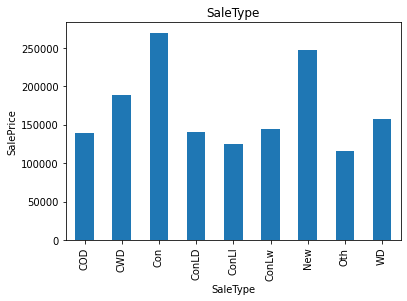

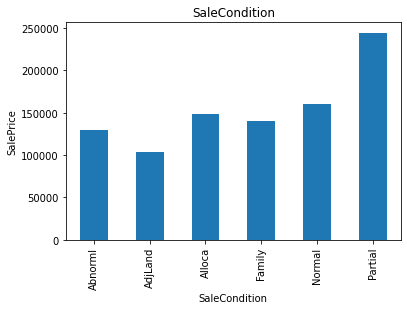

In [30]:
for feature in categorical_features:
    data=df_final.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

# **Feature Engineering**

In [31]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in df_final.columns if df_final[feature].isnull().sum()>1 and df_final[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(df_final[feature].isnull().mean(),4)))

MSZoning: 0.0014% missing values
Alley: 0.9322% missing values
Utilities: 0.0007% missing values
MasVnrType: 0.0082% missing values
BsmtQual: 0.0277% missing values
BsmtCond: 0.0281% missing values
BsmtExposure: 0.0281% missing values
BsmtFinType1: 0.0271% missing values
BsmtFinType2: 0.0274% missing values
Functional: 0.0007% missing values
FireplaceQu: 0.4865% missing values
GarageType: 0.0538% missing values
GarageFinish: 0.0545% missing values
GarageQual: 0.0545% missing values
GarageCond: 0.0545% missing values
PoolQC: 0.9966% missing values
Fence: 0.8044% missing values
MiscFeature: 0.964% missing values


In [32]:
## Replacing the missing values with a new label
def replace_cat_feature(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

df_final=replace_cat_feature(df_final,features_nan)

df_final[features_nan].isnull().sum()

MSZoning        0
Alley           0
Utilities       0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [33]:
df_final.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500.0


In [34]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in df_final.columns if df_final[feature].isnull().sum()>1 and df_final[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(df_final[feature].isnull().mean(),4)))

LotFrontage: 0.1665% missing value
MasVnrArea: 0.0079% missing value
BsmtFullBath: 0.0007% missing value
BsmtHalfBath: 0.0007% missing value
GarageYrBlt: 0.0545% missing value
SalePrice: 0.4998% missing value


In [35]:
## Replacing the numerical Missing Values

for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=df_final[feature].median()
    
    ## create a new feature to capture nan values
    df_final[feature+'nan']=np.where(df_final[feature].isnull(),1,0)
    df_final[feature].fillna(median_value,inplace=True)
    
df_final[numerical_with_nan].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
SalePrice       0
dtype: int64

In [36]:
df_final.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,SalePricenan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,...,2008,WD,Normal,208500.0,0,0,0,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,...,2007,WD,Normal,181500.0,0,0,0,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,...,2008,WD,Normal,223500.0,0,0,0,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,...,2006,WD,Abnorml,140000.0,0,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,...,2008,WD,Normal,250000.0,0,0,0,0,0,0
5,6,50,RL,85.0,14115,Pave,Missing,IR1,Lvl,AllPub,...,2009,WD,Normal,143000.0,0,0,0,0,0,0
6,7,20,RL,75.0,10084,Pave,Missing,Reg,Lvl,AllPub,...,2007,WD,Normal,307000.0,0,0,0,0,0,0
7,8,60,RL,68.0,10382,Pave,Missing,IR1,Lvl,AllPub,...,2009,WD,Normal,200000.0,1,0,0,0,0,0
8,9,50,RM,51.0,6120,Pave,Missing,Reg,Lvl,AllPub,...,2008,WD,Abnorml,129900.0,0,0,0,0,0,0
9,10,190,RL,50.0,7420,Pave,Missing,Reg,Lvl,AllPub,...,2008,WD,Normal,118000.0,0,0,0,0,0,0


In [37]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    df_final[feature]=df_final['YrSold']-df_final[feature]

In [38]:
df_final[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


**Numerical Variables**

Since the numerical variables are skewed we will perform log normal distribution

In [39]:
df_final.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,SalePricenan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,...,2008,WD,Normal,208500.0,0,0,0,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,...,2007,WD,Normal,181500.0,0,0,0,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,...,2008,WD,Normal,223500.0,0,0,0,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,...,2006,WD,Abnorml,140000.0,0,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,...,2008,WD,Normal,250000.0,0,0,0,0,0,0


In [40]:
import numpy as np
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    df_final[feature]=np.log(df_final[feature])

In [41]:
df_final.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,SalePricenan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,...,2008,WD,Normal,12.247694,0,0,0,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,...,2007,WD,Normal,12.109011,0,0,0,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,...,2008,WD,Normal,12.317167,0,0,0,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,...,2006,WD,Abnorml,11.849398,0,0,0,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,...,2008,WD,Normal,12.429216,0,0,0,0,0,0


In [42]:
categorical_features=[feature for feature in df_final.columns if df_final[feature].dtype=='O']

In [43]:
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [44]:
for feature in categorical_features:
    temp=df_final.groupby(feature)['SalePrice'].count()/len(df_final)
    temp_df=temp[temp>0.01].index
    df_final[feature]=np.where(df_final[feature].isin(temp_df),df_final[feature],'Rare_var')

In [45]:
df_final.head(100)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,SalePricenan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,...,2008,WD,Normal,12.247694,0,0,0,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,...,2007,WD,Normal,12.109011,0,0,0,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,...,2008,WD,Normal,12.317167,0,0,0,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,...,2006,WD,Abnorml,11.849398,0,0,0,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,...,2008,WD,Normal,12.429216,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,60,RL,4.219508,9.186560,Pave,Missing,IR2,Lvl,AllPub,...,2009,WD,Normal,12.128111,1,0,0,0,0,0
96,97,20,RL,4.356709,9.236398,Pave,Missing,IR1,Lvl,AllPub,...,2006,WD,Normal,12.273731,0,0,0,0,0,0
97,98,20,RL,4.290459,9.298443,Pave,Missing,Reg,HLS,AllPub,...,2007,WD,Normal,11.458997,0,0,0,0,0,0
98,99,30,RL,4.442651,9.270965,Pave,Missing,Reg,Lvl,AllPub,...,2010,COD,Abnorml,11.326596,0,0,0,0,0,0


In [46]:
df_final = df_final.dropna()

In [47]:
for feature in categorical_features:
    labels_ordered=df_final.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df_final[feature]=df_final[feature].map(labels_ordered)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [48]:
feature_scale=[feature for feature in df_final.columns if feature not in ['Id','SalePrice'] ]
len(feature_scale)

85

In [49]:
feature_scale

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df_final[feature_scale])

MinMaxScaler()

In [51]:
scaler.transform(df_final[feature_scale])

array([[0.23529412, 0.66666667, 0.41820812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.66666667, 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.66666667, 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.66666667, 0.75162522, ..., 0.        , 0.        ,
        1.        ],
       [0.38235294, 0.66666667, 0.40071794, ..., 0.        , 1.        ,
        1.        ],
       [0.23529412, 0.66666667, 0.46620707, ..., 0.        , 0.        ,
        1.        ]])

In [52]:
data = pd.concat([df_final[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df_final[feature_scale]), columns=feature_scale)],
                    axis=1)

In [53]:
data.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,SalePricenan
0,1,12.247694,0.235294,0.666667,0.418208,0.366344,1.0,1.0,0.000000,0.333333,...,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0
1,2,12.109011,0.000000,0.666667,0.495064,0.391317,1.0,1.0,0.000000,0.333333,...,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0
2,3,12.317167,0.235294,0.666667,0.434909,0.422359,1.0,1.0,0.333333,0.333333,...,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0
3,4,11.849398,0.294118,0.666667,0.388581,0.390295,1.0,1.0,0.333333,0.333333,...,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4,5,12.429216,0.235294,0.666667,0.513123,0.468761,1.0,1.0,0.333333,0.333333,...,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
data.shape

(2917, 87)

In [55]:
df_final.shape

(2917, 87)

In [56]:
data.to_csv('final.csv', index = False)

In [57]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [58]:
data.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,SalePricenan
0,1,12.247694,0.235294,0.666667,0.418208,0.366344,1.0,1.0,0.000000,0.333333,...,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0
1,2,12.109011,0.000000,0.666667,0.495064,0.391317,1.0,1.0,0.000000,0.333333,...,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0
2,3,12.317167,0.235294,0.666667,0.434909,0.422359,1.0,1.0,0.333333,0.333333,...,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0
3,4,11.849398,0.294118,0.666667,0.388581,0.390295,1.0,1.0,0.333333,0.333333,...,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4,5,12.429216,0.235294,0.666667,0.513123,0.468761,1.0,1.0,0.333333,0.333333,...,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
y = data['SalePrice']

In [60]:
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [61]:
X = data.drop(['Id', 'SalePrice'], axis = 1)

In [62]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,SalePricenan
0,0.235294,0.666667,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,...,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.666667,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,...,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0
2,0.235294,0.666667,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,...,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0
3,0.294118,0.666667,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,...,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4,0.235294,0.666667,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,...,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [64]:
# feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=1)) 
# feature_sel_model.fit(X_train, y_train)

In [65]:
# feature_sel_model.get_support()

In [66]:
# # let's print the number of total and selected features

# # this is how we can make a list of the selected features
# selected_feat = X_train.columns[(feature_sel_model.get_support())]

# # let's print some stats
# print('total features: {}'.format((X_train.shape[1])))
# print('selected features: {}'.format(len(selected_feat)))
# print('features with coefficients shrank to zero: {}'.format(np.sum(feature_sel_model.estimator_.coef_ == 0)))

In [67]:
# selected_feat

In [68]:
# X_train=X_train[selected_feat]

In [69]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,SalePricenan
2401,0.411765,0.666667,0.406640,0.371329,1.0,1.0,0.000000,0.333333,1.0,0.25,...,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,1.0
1504,0.000000,1.000000,0.495064,0.355633,1.0,1.0,0.000000,0.333333,1.0,0.00,...,0.272727,1.00,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,1.0
1357,0.000000,0.666667,0.434909,0.443558,1.0,1.0,0.333333,0.333333,1.0,1.00,...,0.272727,1.00,0.666667,0.75,1.0,0.0,0.0,0.0,0.0,0.0
2341,0.000000,0.666667,0.445638,0.361680,1.0,1.0,0.000000,0.333333,1.0,0.00,...,0.272727,0.25,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,1.0
2739,0.000000,0.666667,0.434909,0.391521,1.0,1.0,0.333333,0.333333,1.0,0.25,...,1.000000,0.00,0.666667,0.75,1.0,0.0,0.0,0.0,0.0,1.0


In [70]:
lassor = Lasso(alpha = 0.0001)
lassor = lassor.fit(X_train, y_train)
y_pred = lassor.predict(X_test)

In [72]:
from sklearn.metrics import r2_score
r2 = r2_score(y_pred, y_test)

In [73]:
r2

-0.4027305425309988